In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# URL to scrape
url = "https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy"

# Get the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables
tables = soup.find_all('table', {'class': 'wikitable'})

# List to hold DataFrames and titles
dataframes = []
titles = []

# Loop over each table and extract headers and rows
for i, table in enumerate(tables):
    headers = []
    rows_data = []

    # Get caption/title if available
    caption_tag = table.find('caption')
    title = caption_tag.text.strip() if caption_tag else f"Table {i + 1} (No caption)"
    titles.append(title)

    # Extract headers
    header_row = table.find('tr')
    for th in header_row.find_all('th'):
        headers.append(th.text.strip())

    # Extract rows
    for row in table.find_all('tr')[1:]:
        cells = row.find_all(['td', 'th'])
        row_data = [cell.text.strip() for cell in cells]
        if row_data:
            rows_data.append(row_data)

    # Create DataFrame (handle inconsistent rows)
    if all(len(r) == len(headers) for r in rows_data):
        df = pd.DataFrame(rows_data, columns=headers)
    else:
        df = pd.DataFrame(rows_data)

    dataframes.append(df)

In [ ]:
## saved each table in separated excel file

for i in range(len(dataframes)) :
    dataframes[i].to_excel(f"table{i+1}.xlsx", index=False, engine='openpyxl')
    print(f"{titles[i]} is saved")

UN: Estimate of life expectancy for various ages in 2023 is saved
UN: Change of life expectancy from 2019 to 2023 is saved
World Bank Group (2022) is saved
World Health Organization (2019) is saved
CIA World Factbook (2022). All, male, female, and sex gap. is saved
OECD (2022) is saved


In [ ]:
#cleaning of table 1

sh1=pd.read_excel(r"table2.xlsx", header=1)
sh1.columns= ['Countries and territories', 'All', 'Male', 'Female', 'Sex gap', '2019', '2019:2020', '2020', '2020:2021', '2021', '2021:2022', '2022', '2022:2023', '2023','Recovery from COVID-19: 2019:2023', '0']
print(f"العدد الكلي للأعمدة في البيانات: {sh1.shape[1]}")

العدد الكلي للأعمدة في البيانات: 16


In [ ]:
sh1.head()

,Countries and territories,All,Male,Female,Sex gap,2019,2019:2020,2020,2020:2021,2021,2021:2022,2022,2022:2023,2023,Recovery from COVID-19: 2019:2023,0
0,"Hong Kong, China",85.51,82.84,88.13,5.29,85.26,−0.56,84.71,0.38,85.08,−1.60,83.48,2.03,85.51,0.25,NaN
1,Japan,84.71,81.69,87.74,6.05,84.42,0.25,84.67,−0.12,84.55,−0.50,84.05,0.66,84.71,0.29,NaN
2,South Korea,84.33,81.19,87.16,5.96,83.69,−0.01,83.67,0.18,83.85,−1.12,82.73,1.60,84.33,0.64,NaN
3,French Polynesia,84.07,81.78,86.50,4.73,83.19,−0.74,82.46,−2.89,79.57,4.29,83.86,0.21,84.07,0.88,NaN
4,Andorra,84.04,82.10,86.11,4.01,84.10,−4.68,79.42,2.91,82.33,1.69,84.02,0.03,84.04,−0.06,NaN


In [ ]:
sh1.drop('0', axis=1, inplace=True)
sh1.head()


,Countries and territories,All,Male,Female,Sex gap,2019,2019:2020,2020,2020:2021,2021,2021:2022,2022,2022:2023,2023,Recovery from COVID-19: 2019:2023
0,"Hong Kong, China",85.51,82.84,88.13,5.29,85.26,−0.56,84.71,0.38,85.08,−1.60,83.48,2.03,85.51,0.25
1,Japan,84.71,81.69,87.74,6.05,84.42,0.25,84.67,−0.12,84.55,−0.50,84.05,0.66,84.71,0.29
2,South Korea,84.33,81.19,87.16,5.96,83.69,−0.01,83.67,0.18,83.85,−1.12,82.73,1.60,84.33,0.64
3,French Polynesia,84.07,81.78,86.50,4.73,83.19,−0.74,82.46,−2.89,79.57,4.29,83.86,0.21,84.07,0.88
4,Andorra,84.04,82.10,86.11,4.01,84.10,−4.68,79.42,2.91,82.33,1.69,84.02,0.03,84.04,−0.06


In [ ]:
print(sh1.dtypes)


Countries and territories             object
All                                  float64
Male                                 float64
Female                               float64
Sex gap                              float64
2019                                 float64
2019:2020                             object
2020                                 float64
2020:2021                             object
2021                                 float64
2021:2022                             object
2022                                 float64
2022:2023                             object
2023                                 float64
Recovery from COVID-19: 2019:2023     object
dtype: object


In [ ]:
cols_to_convert = ['2019:2020', '2020:2021', '2021:2022','2022:2023', 'Recovery from COVID-19: 2019:2023']

for col in cols_to_convert:
    sh1[col] = (sh1[col].astype(str)
               .str.replace('−', '-')
               .str.replace(',', '.')
               .str.replace(r'[^\d.-]', '', regex=True))
    sh1[col] = pd.to_numeric(sh1[col], errors='coerce')

In [ ]:
sh1['2019:2020'] = sh1['2019:2020'].astype(float)
sh1['2020:2021'] = sh1['2020:2021'].astype(float)
sh1['2021:2022'] = sh1['2021:2022'].astype(float)
sh1['2022:2023'] = sh1['2022:2023'].astype(float)
sh1['Recovery from COVID-19: 2019:2023'] = sh1['Recovery from COVID-19: 2019:2023'].astype(float)

In [ ]:
numeric_cols = sh1.select_dtypes(include=['float']).columns
sh1[numeric_cols] = sh1[numeric_cols].abs()

sh1.head()

,Countries and territories,All,Male,Female,Sex gap,2019,2019:2020,2020,2020:2021,2021,2021:2022,2022,2022:2023,2023,Recovery from COVID-19: 2019:2023
0,"Hong Kong, China",85.51,82.84,88.13,5.29,85.26,0.56,84.71,0.38,85.08,1.60,83.48,2.03,85.51,0.25
1,Japan,84.71,81.69,87.74,6.05,84.42,0.25,84.67,0.12,84.55,0.50,84.05,0.66,84.71,0.29
2,South Korea,84.33,81.19,87.16,5.96,83.69,0.01,83.67,0.18,83.85,1.12,82.73,1.60,84.33,0.64
3,French Polynesia,84.07,81.78,86.50,4.73,83.19,0.74,82.46,2.89,79.57,4.29,83.86,0.21,84.07,0.88
4,Andorra,84.04,82.10,86.11,4.01,84.10,4.68,79.42,2.91,82.33,1.69,84.02,0.03,84.04,0.06


In [ ]:
sh1.isnull().sum()


Countries and territories            0
All                                  0
Male                                 0
Female                               0
Sex gap                              0
2019                                 0
2019:2020                            0
2020                                 0
2020:2021                            0
2021                                 0
2021:2022                            0
2022                                 0
2022:2023                            0
2023                                 0
Recovery from COVID-19: 2019:2023    0
dtype: int64

In [ ]:
print(sh1.duplicated().sum())


0


In [ ]:
sh1.dtypes


Countries and territories             object
All                                  float64
Male                                 float64
Female                               float64
Sex gap                              float64
2019                                 float64
2019:2020                            float64
2020                                 float64
2020:2021                            float64
2021                                 float64
2021:2022                            float64
2022                                 float64
2022:2023                            float64
2023                                 float64
Recovery from COVID-19: 2019:2023    float64
dtype: object

In [ ]:
#cleaning of table 2

sh2=pd.read_excel(r"table4.xlsx", header=1)
sh2.columns=['Countries','All','M', 'F','FΔM','Δ2000','All.1','M.1','F.1','FΔM.1','Δ2000.1','All.2','M.2','F.2','FΔM.2','Δ2000.2','All.3','M.3','F.3','FΔM.3','Δ2000.3']


In [ ]:
sh2.head()

,Countries,All,M,F,FΔM,Δ2000,All.1,M.1,F.1,FΔM.1,...,All.2,M.2,F.2,FΔM.2,Δ2000.2,All.3,M.3,F.3,FΔM.3,Δ2000.3
0,Japan,84.3,81.5,86.9,5.4,3.2,74.1,72.6,75.5,2.9,...,26.3,23.9,28.6,4.7,2.2,20.4,18.8,21.8,3.0,1.7
1,Switzerland,83.4,81.8,85.1,3.3,3.7,72.5,72.2,72.8,0.6,...,25.4,24.1,26.6,2.5,2.4,19.5,18.8,20.2,1.4,1.8
2,South Korea,83.3,80.3,86.1,5.8,7.1,73.1,71.3,74.7,3.4,...,25.8,23.4,27.9,4.5,5.1,19.8,18.2,21.2,3.0,3.9
3,Singapore,83.2,81.0,85.5,4.5,4.8,73.6,72.4,74.7,2.3,...,25.5,23.8,27.2,3.4,4.0,20.0,18.8,21.0,2.2,3.4
4,Spain,83.2,80.7,85.7,5.0,4.1,72.1,71.3,72.9,1.6,...,25.4,23.3,27.3,4.0,2.7,19.2,18.0,20.3,2.3,1.9


In [ ]:
print(sh2.dtypes)


Countries     object
All          float64
M            float64
F            float64
FΔM           object
Δ2000         object
All.1        float64
M.1          float64
F.1          float64
FΔM.1         object
Δ2000.1       object
All.2        float64
M.2          float64
F.2          float64
FΔM.2         object
Δ2000.2       object
All.3        float64
M.3          float64
F.3          float64
FΔM.3         object
Δ2000.3       object
dtype: object


In [ ]:
cols_to_convert = ['FΔM','Δ2000','FΔM.1','Δ2000.1','FΔM.2','Δ2000.2','FΔM.3','Δ2000.3']

for col in cols_to_convert:
    sh2[col] = (sh2[col].astype(str)
               .str.replace('−', '-')
               .str.replace(',', '.')
               .str.replace(r'[^\d.-]', '', regex=True))
    sh2[col] = pd.to_numeric(sh2[col], errors='coerce')

In [ ]:
sh2['FΔM'] = sh2['FΔM'].astype(float)
sh2['Δ2000'] = sh2['Δ2000'].astype(float)
sh2['FΔM.1'] = sh2['FΔM.1'].astype(float)
sh2['Δ2000.1'] = sh2['Δ2000.1'].astype(float)
sh2['FΔM.2'] = sh2['FΔM.2'].astype(float)
sh2['Δ2000.2'] = sh2['Δ2000.2'].astype(float)
sh2['FΔM.3'] = sh2['FΔM.3'].astype(float)
sh2['Δ2000.3'] = sh2['Δ2000.3'].astype(float)

In [ ]:
print(sh2.dtypes)


Countries     object
All          float64
M            float64
F            float64
FΔM          float64
Δ2000        float64
All.1        float64
M.1          float64
F.1          float64
FΔM.1        float64
Δ2000.1      float64
All.2        float64
M.2          float64
F.2          float64
FΔM.2        float64
Δ2000.2      float64
All.3        float64
M.3          float64
F.3          float64
FΔM.3        float64
Δ2000.3      float64
dtype: object


In [ ]:
numeric_cols = sh2.select_dtypes(include=['float']).columns
sh2[numeric_cols] = sh2[numeric_cols].abs()

sh2.head()

,Countries,All,M,F,FΔM,Δ2000,All.1,M.1,F.1,FΔM.1,...,All.2,M.2,F.2,FΔM.2,Δ2000.2,All.3,M.3,F.3,FΔM.3,Δ2000.3
0,Japan,84.3,81.5,86.9,5.4,3.2,74.1,72.6,75.5,2.9,...,26.3,23.9,28.6,4.7,2.2,20.4,18.8,21.8,3.0,1.7
1,Switzerland,83.4,81.8,85.1,3.3,3.7,72.5,72.2,72.8,0.6,...,25.4,24.1,26.6,2.5,2.4,19.5,18.8,20.2,1.4,1.8
2,South Korea,83.3,80.3,86.1,5.8,7.1,73.1,71.3,74.7,3.4,...,25.8,23.4,27.9,4.5,5.1,19.8,18.2,21.2,3.0,3.9
3,Singapore,83.2,81.0,85.5,4.5,4.8,73.6,72.4,74.7,2.3,...,25.5,23.8,27.2,3.4,4.0,20.0,18.8,21.0,2.2,3.4
4,Spain,83.2,80.7,85.7,5.0,4.1,72.1,71.3,72.9,1.6,...,25.4,23.3,27.3,4.0,2.7,19.2,18.0,20.3,2.3,1.9


In [ ]:
print(sh2.duplicated().sum())
sh2.isnull().sum()


0


Countries    0
All          0
M            0
F            0
FΔM          0
Δ2000        0
All.1        0
M.1          0
F.1          0
FΔM.1        0
Δ2000.1      0
All.2        0
M.2          0
F.2          0
FΔM.2        0
Δ2000.2      0
All.3        0
M.3          0
F.3          0
FΔM.3        0
Δ2000.3      0
dtype: int64

In [ ]:
sh2.to_excel("World Health Organization (2019).xlsx", index=False)

In [ ]:
#cleaning of table 3

sh3=pd.read_excel(r"table5.xlsx", header=1)
sh3.head()


,Monaco,89.60,85.70,93.49,7.79
0,Singapore,86.43,83.65,89.20,5.55
1,Macau,85.06,82.09,88.02,5.93
2,Japan,84.91,81.92,87.90,5.98
3,San Marino,83.86,81.30,86.65,5.35
4,Canada,83.80,81.52,86.21,4.69


In [ ]:
print(sh3.dtypes)


Monaco     object
89.60     float64
85.70     float64
93.49     float64
7.79      float64
dtype: object


In [ ]:
sh3.isnull().sum()


Monaco    0
89.60     0
85.70     0
93.49     0
7.79      0
dtype: int64

In [ ]:
print(sh3.duplicated().sum())


0


In [ ]:
sh3.to_excel("CIA World Factbook (2022).xlsx", index=False)

In [ ]:
# cleaning of table 4

sh4=pd.read_excel(r"table3.xlsx", header=1)
sh4.columns= ['Countries and territories', 'All', 'Male', 'Female', 'Sex gap','2014', '2014:2019', '2019','2019:2020', '2020', '2020:2021', '2021', '2021:2022', '2022', 'recovery from COVID-19: 2019:2022',' ']
sh4.head()


,Countries and territories,All,Male,Female,Sex gap,2014,2014:2019,2019,2019:2020,2020,2020:2021,2021,2021:2022,2022,recovery from COVID-19: 2019:2022,
0,"Macao SAR, China",85.38,82.75,87.98,5.23,83.88,1.09,84.98,0.21,85.18,0.22,85.40,−0.02,85.38,0.40,NaN
1,Japan,84.00,81.05,87.09,6.04,83.59,0.77,84.36,0.20,84.56,−0.11,84.45,−0.45,84.00,−0.36,NaN
2,"Hong Kong SAR, China",83.66,80.70,86.77,6.07,83.94,1.22,85.16,0.34,85.50,0.04,85.53,−1.87,83.66,−1.49,NaN
3,French Polynesia,83.55,81.33,85.98,4.65,82.21,0.78,83.00,−0.78,82.22,−2.73,79.49,4.06,83.55,0.55,NaN
4,Switzerland,83.45,81.60,85.40,3.80,83.20,0.71,83.90,−0.90,83.00,0.75,83.75,−0.30,83.45,−0.45,NaN


In [ ]:
sh4.drop(' ', axis=1, inplace=True)
sh4.head()


,Countries and territories,All,Male,Female,Sex gap,2014,2014:2019,2019,2019:2020,2020,2020:2021,2021,2021:2022,2022,recovery from COVID-19: 2019:2022
0,"Macao SAR, China",85.38,82.75,87.98,5.23,83.88,1.09,84.98,0.21,85.18,0.22,85.40,−0.02,85.38,0.40
1,Japan,84.00,81.05,87.09,6.04,83.59,0.77,84.36,0.20,84.56,−0.11,84.45,−0.45,84.00,−0.36
2,"Hong Kong SAR, China",83.66,80.70,86.77,6.07,83.94,1.22,85.16,0.34,85.50,0.04,85.53,−1.87,83.66,−1.49
3,French Polynesia,83.55,81.33,85.98,4.65,82.21,0.78,83.00,−0.78,82.22,−2.73,79.49,4.06,83.55,0.55
4,Switzerland,83.45,81.60,85.40,3.80,83.20,0.71,83.90,−0.90,83.00,0.75,83.75,−0.30,83.45,−0.45


In [ ]:
print(sh4.dtypes)


Countries and territories             object
All                                   object
Male                                  object
Female                                object
Sex gap                               object
2014                                  object
2014:2019                             object
2019                                  object
2019:2020                             object
2020                                  object
2020:2021                             object
2021                                 float64
2021:2022                             object
2022                                  object
recovery from COVID-19: 2019:2022     object
dtype: object


In [ ]:
cols_to_convert = ['All', 'Male', 'Female', 'Sex gap', '2014', '2014:2019', '2019', '2019:2020', '2020', '2020:2021', '2021:2022', '2022', 'recovery from COVID-19: 2019:2022']

for col in cols_to_convert:
    sh4[col] = (sh4[col].astype(str)
               .str.replace('−', '-')
               .str.replace(',', '.')
               .str.replace(r'[^\d.-]', '', regex=True))
    sh4[col] = pd.to_numeric(sh4[col], errors='coerce')

In [ ]:
sh4['All'] = sh4['All'].astype(float)
sh4['Male'] = sh4['Male'].astype(float)
sh4['Female'] = sh4['Female'].astype(float)
sh4['Sex gap'] = sh4['Sex gap'].astype(float)
sh4['2014'] = sh4['2014'].astype(float)
sh4['2014:2019'] = sh4['2014:2019'].astype(float)
sh4['2019'] = sh4['2019'].astype(float)
sh4['2019:2020'] = sh4['2019:2020'].astype(float)
sh4['2020'] = sh4['2020'].astype(float)
sh4['2020:2021'] = sh4['2020:2021'].astype(float)
sh4['2021:2022'] = sh4['2021:2022'].astype(float)
sh4['2022'] = sh4['2022'].astype(float)
sh4['recovery from COVID-19: 2019:2022'] = sh4['recovery from COVID-19: 2019:2022'].astype(float)
print(sh4.dtypes)


Countries and territories             object
All                                  float64
Male                                 float64
Female                               float64
Sex gap                              float64
2014                                 float64
2014:2019                            float64
2019                                 float64
2019:2020                            float64
2020                                 float64
2020:2021                            float64
2021                                 float64
2021:2022                            float64
2022                                 float64
recovery from COVID-19: 2019:2022    float64
dtype: object


In [ ]:
numeric_cols = sh4.select_dtypes(include=['float']).columns
sh4[numeric_cols] = sh4[numeric_cols].abs()

sh4.head()

,Countries and territories,All,Male,Female,Sex gap,2014,2014:2019,2019,2019:2020,2020,2020:2021,2021,2021:2022,2022,recovery from COVID-19: 2019:2022
0,"Macao SAR, China",85.38,82.75,87.98,5.23,83.88,1.09,84.98,0.21,85.18,0.22,85.40,0.02,85.38,0.40
1,Japan,84.00,81.05,87.09,6.04,83.59,0.77,84.36,0.20,84.56,0.11,84.45,0.45,84.00,0.36
2,"Hong Kong SAR, China",83.66,80.70,86.77,6.07,83.94,1.22,85.16,0.34,85.50,0.04,85.53,1.87,83.66,1.49
3,French Polynesia,83.55,81.33,85.98,4.65,82.21,0.78,83.00,0.78,82.22,2.73,79.49,4.06,83.55,0.55
4,Switzerland,83.45,81.60,85.40,3.80,83.20,0.71,83.90,0.90,83.00,0.75,83.75,0.30,83.45,0.45


In [ ]:
sh4.isnull().sum()


Countries and territories            0
All                                  1
Male                                 1
Female                               1
Sex gap                              1
2014                                 1
2014:2019                            1
2019                                 1
2019:2020                            1
2020                                 1
2020:2021                            1
2021                                 0
2021:2022                            1
2022                                 1
recovery from COVID-19: 2019:2022    1
dtype: int64

In [ ]:
columns_to_fill = [
    "All", "Male", "Female", "Sex gap",
    "2014", "2014:2019", "2019", "2019:2020",
    "2020", "2020:2021", "2021:2022", "2022",
    "recovery from COVID-19: 2019:2022"
]

for col in columns_to_fill:
    sh4[col] = sh4[col].fillna(sh4[col].mean())

sh4.isnull().sum()


Countries and territories            0
All                                  0
Male                                 0
Female                               0
Sex gap                              0
2014                                 0
2014:2019                            0
2019                                 0
2019:2020                            0
2020                                 0
2020:2021                            0
2021                                 0
2021:2022                            0
2022                                 0
recovery from COVID-19: 2019:2022    0
dtype: int64

In [ ]:
print(sh4.duplicated().sum())


0


In [ ]:
sh4.to_excel("World Bank Group (2022).xlsx", index=False)

In [ ]:
# cleaning of table 5

sh5=pd.read_excel(r"table1.xlsx", header=1)
sh5.columns= ['Locations','at birth','bonus0→15','at 15','bonus15→65','at 65','bonus65→80','at 80','at birth.1','at 15.1','at 65.1',    '80.1', 'at birth.2','at 15.2', 'at 65.2','at 80.2','at birth.3','at 15.3','at 65.3','at 80.3',' ']


In [ ]:
sh5.head()


,Locations,at birth,bonus0→15,at 15,bonus15→65,at 65,bonus65→80,at 80,at birth.1,at 15.1,...,80.1,at birth.2,at 15.2,at 65.2,at 80.2,at birth.3,at 15.3,at 65.3,at 80.3,
0,Hong Kong,85.51,0.21,70.72,2.47,23.19,3.27,11.45,82.84,68.06,...,10.26,88.13,73.33,25.21,12.54,5.29,5.27,4.00,2.27,NaN
1,Japan,84.71,0.24,69.96,2.54,22.49,3.45,10.95,81.69,66.93,...,9.27,87.74,72.98,24.85,12.20,6.05,6.05,4.87,2.93,NaN
2,South Korea,84.33,0.30,69.63,1.69,21.32,4.14,10.45,81.19,66.51,...,8.40,87.16,72.44,23.55,11.68,5.96,5.93,4.92,3.27,NaN
3,French Polynesia,84.07,0.58,69.65,1.85,21.50,3.72,10.23,81.78,67.37,...,8.88,86.50,72.07,23.48,11.37,4.73,4.70,3.90,2.48,NaN
4,Andorra,84.04,0.58,69.62,1.85,21.47,3.72,10.19,82.10,67.68,...,9.03,86.11,71.70,23.18,11.16,4.01,4.02,3.36,2.13,NaN


In [ ]:
sh5.drop(' ', axis=1, inplace=True)


In [ ]:
print(sh5.dtypes)


Locations      object
at birth      float64
bonus0→15     float64
at 15         float64
bonus15→65    float64
at 65         float64
bonus65→80    float64
at 80         float64
at birth.1    float64
at 15.1       float64
at 65.1       float64
80.1          float64
at birth.2    float64
at 15.2       float64
at 65.2       float64
at 80.2       float64
at birth.3    float64
at 15.3       float64
at 65.3       float64
at 80.3        object
dtype: object


In [ ]:
cols_to_convert = ['at 80.3']

for col in cols_to_convert:
    sh5[col] = (sh5[col].astype(str)
               .str.replace('−', '-')
               .str.replace(',', '.')
               .str.replace(r'[^\d.-]', '', regex=True))
    sh5[col] = pd.to_numeric(sh5[col], errors='coerce')

In [ ]:
sh5['at 80.3'] = sh5['at 80.3'].astype(float)


In [ ]:
numeric_cols = sh5.select_dtypes(include=['float']).columns
sh5[numeric_cols] = sh5[numeric_cols].abs()

sh5.head()

,Locations,at birth,bonus0→15,at 15,bonus15→65,at 65,bonus65→80,at 80,at birth.1,at 15.1,at 65.1,80.1,at birth.2,at 15.2,at 65.2,at 80.2,at birth.3,at 15.3,at 65.3,at 80.3
0,Hong Kong,85.51,0.21,70.72,2.47,23.19,3.27,11.45,82.84,68.06,21.21,10.26,88.13,73.33,25.21,12.54,5.29,5.27,4.00,2.27
1,Japan,84.71,0.24,69.96,2.54,22.49,3.45,10.95,81.69,66.93,19.98,9.27,87.74,72.98,24.85,12.20,6.05,6.05,4.87,2.93
2,South Korea,84.33,0.30,69.63,1.69,21.32,4.14,10.45,81.19,66.51,18.63,8.40,87.16,72.44,23.55,11.68,5.96,5.93,4.92,3.27
3,French Polynesia,84.07,0.58,69.65,1.85,21.50,3.72,10.23,81.78,67.37,19.58,8.88,86.50,72.07,23.48,11.37,4.73,4.70,3.90,2.48
4,Andorra,84.04,0.58,69.62,1.85,21.47,3.72,10.19,82.10,67.68,19.81,9.03,86.11,71.70,23.18,11.16,4.01,4.02,3.36,2.13


In [ ]:
sh5.isnull().sum()


Locations     0
at birth      0
bonus0→15     0
at 15         0
bonus15→65    0
at 65         0
bonus65→80    0
at 80         0
at birth.1    0
at 15.1       0
at 65.1       0
80.1          0
at birth.2    0
at 15.2       0
at 65.2       0
at 80.2       0
at birth.3    0
at 15.3       0
at 65.3       0
at 80.3       0
dtype: int64

In [ ]:
print(sh5.duplicated().sum())


0


In [ ]:
sh5.to_excel("Estimate of life expectancy for various ages in 2023.xlsx", index=False)

In [ ]:
#cleaning of table 6

sh6=pd.read_excel(r"table6.xlsx")
sh6.head()


,Country,2022overall,2022male,2022female,2022FΔM,2019,2019→2020,2020,2020→2021,2021,2021→2022,2022,2019→2022
0,Japan,—,—,—,—,84.4,0.2,84.6,−0.1,84.5,—,—,—
1,Switzerland,83.5,81.6,85.4,3.8,84.0,−0.9,83.1,0.8,83.9,−0.4,83.5,−0.5
2,Spain,83.2,80.4,85.9,5.5,84.0,−1.6,82.4,0.9,83.3,−0.1,83.2,−0.8
3,Italy,83.0,80.9,85.0,4.1,83.6,−1.3,82.3,0.4,82.7,0.3,83.0,−0.6
4,South Korea,—,—,—,—,83.3,0.2,83.5,0.1,83.6,—,—,—


In [ ]:
print(sh6.dtypes)


Country         object
2022overall     object
2022male        object
2022female      object
2022FΔM         object
2019           float64
2019→2020       object
2020            object
2020→2021       object
2021            object
2021→2022       object
2022            object
2019→2022       object
dtype: object


In [ ]:
cols_to_convert = ['2022overall','2022male','2022female','2022FΔM','2019→2020','2020','2020→2021','2021','2021→2022','2022','2019→2022']

for col in cols_to_convert:
    sh6[col] = (sh6[col].astype(str)
               .str.replace('−', '-')
               .str.replace(',', '.')
               .str.replace(r'[^\d.-]', '', regex=True))
    sh6[col] = pd.to_numeric(sh6[col], errors='coerce')


In [ ]:
sh6['2022overall'] = sh6['2022overall'].astype(float)
sh6['2022male'] = sh6['2022male'].astype(float)
sh6['2022female'] = sh6['2022female'].astype(float)
sh6['2022FΔM'] = sh6['2022FΔM'].astype(float)
sh6['2019→2020'] = sh6['2019→2020'].astype(float)
sh6['2020'] = sh6['2020'].astype(float)
sh6['2020→2021'] = sh6['2020→2021'].astype(float)
sh6['2021'] = sh6['2021'].astype(float)
sh6['2021→2022'] = sh6['2021→2022'].astype(float)
sh6['2022'] = sh6['2022'].astype(float)
sh6['2019→2022'] = sh6['2019→2022'].astype(float)

In [ ]:
print(sh6.dtypes)


Country         object
2022overall    float64
2022male       float64
2022female     float64
2022FΔM        float64
2019           float64
2019→2020      float64
2020           float64
2020→2021      float64
2021           float64
2021→2022      float64
2022           float64
2019→2022      float64
dtype: object


In [ ]:
sh6.isnull().sum()


Country         0
2022overall    11
2022male       12
2022female     12
2022FΔM        12
2019            0
2019→2020       2
2020            2
2020→2021       3
2021            3
2021→2022      11
2022           11
2019→2022      11
dtype: int64

In [ ]:
columns_to_fill = [
    "2022overall", "2022male", "2022female", "2022FΔM",
    "2019→2020", "2020", "2020→2021", "2021",
    "2021→2022", "2022", "2019→2022",
]

for col in columns_to_fill:
    sh6[col] = sh6[col].fillna(sh6[col].mean())

In [ ]:
sh6.isnull().sum()


Country        0
2022overall    0
2022male       0
2022female     0
2022FΔM        0
2019           0
2019→2020      0
2020           0
2020→2021      0
2021           0
2021→2022      0
2022           0
2019→2022      0
dtype: int64

In [ ]:
print(sh6.duplicated().sum())


0


In [ ]:
sh6.to_excel("OECD (2022).xlsx", index=False)

# End of cleaning
-------------

# start of analysis

In [ ]:
sh1 = pd.read_excel(r"Change of life expectancy from 2019 to 2023.xlsx")
print(sh1.dtypes)
pd.DataFrame(sh1)

Countries and territories             object
All                                  float64
Male                                 float64
Female                               float64
Sex gap                              float64
2019                                 float64
2019:2020                            float64
2020                                 float64
2020:2021                            float64
2021                                 float64
2021:2022                            float64
2022                                 float64
2022:2023                            float64
2023                                 float64
Recovery from COVID-19: 2019:2023    float64
dtype: object


,Countries and territories,All,Male,Female,Sex gap,2019,2019:2020,2020,2020:2021,2021,2021:2022,2022,2022:2023,2023,Recovery from COVID-19: 2019:2023
0,"Hong Kong, China",85.51,82.84,88.13,5.29,85.26,0.56,84.71,0.38,85.08,1.60,83.48,2.03,85.51,0.25
1,Japan,84.71,81.69,87.74,6.05,84.42,0.25,84.67,0.12,84.55,0.50,84.05,0.66,84.71,0.29
2,South Korea,84.33,81.19,87.16,5.96,83.69,0.01,83.67,0.18,83.85,1.12,82.73,1.60,84.33,0.64
3,French Polynesia,84.07,81.78,86.50,4.73,83.19,0.74,82.46,2.89,79.57,4.29,83.86,0.21,84.07,0.88
4,Andorra,84.04,82.10,86.11,4.01,84.10,4.68,79.42,2.91,82.33,1.69,84.02,0.03,84.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,South Sudan,57.62,54.64,60.63,5.99,58.13,0.48,57.65,0.60,57.05,0.16,57.20,0.41,57.62,0.51
207,CAR,57.41,55.26,59.29,4.03,31.53,19.07,50.60,10.32,40.28,21.46,18.82,38.59,57.41,25.88
208,Lesotho,57.38,54.62,60.01,5.39,55.25,0.12,55.13,0.92,54.21,2.60,56.81,0.56,57.38,2.13
209,Chad,55.07,53.20,57.01,3.82,52.99,0.09,53.08,0.05,53.14,1.39,54.53,0.54,55.07,2.08


In [ ]:
top5_2023 = sh1[['Countries and territories', '2023']].sort_values(by='2023', ascending=False).head(5)
print(top5_2023)
top5_names = pd.DataFrame(top5_2023['Countries and territories'].tolist())
print(top5_names)

  Countries and territories   2023
0          Hong Kong, China  85.51
1                     Japan  84.71
2               South Korea  84.33
3          French Polynesia  84.07
4                   Andorra  84.04
                  0
0  Hong Kong, China
1             Japan
2       South Korea
3  French Polynesia
4           Andorra


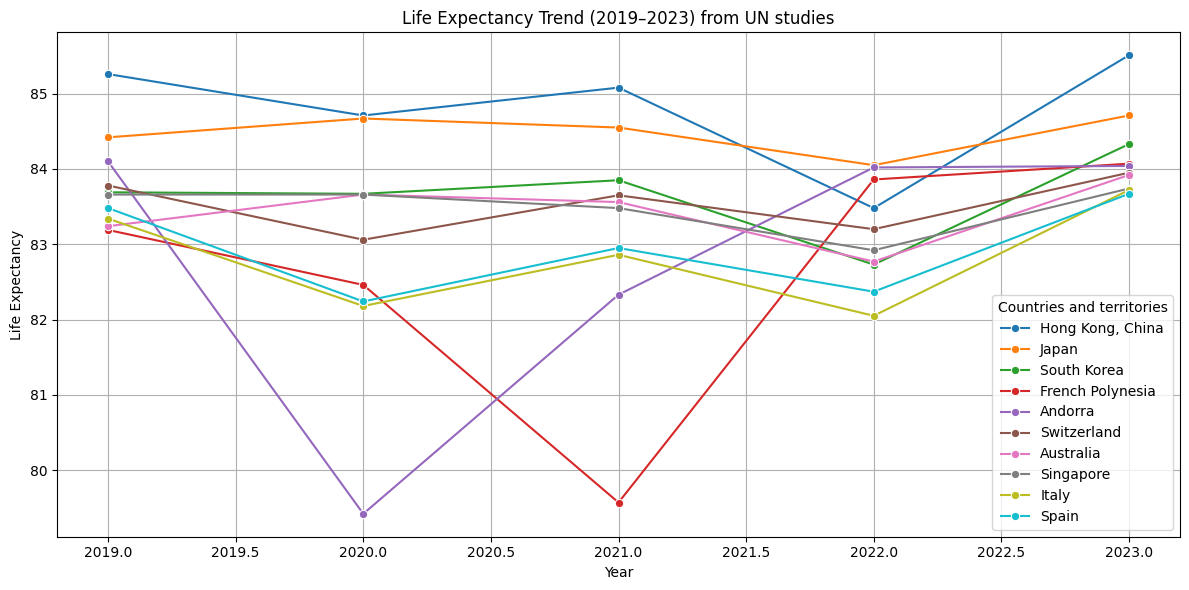

In [ ]:
years = ['2019', '2020', '2021', '2022', '2023']

# convert into Long Format
df_long = sh1.melt(id_vars=['Countries and territories'],
                  value_vars=years,
                  var_name='Year',
                  value_name='Life Expectancy')

# convert year into integet
df_long['Year'] = df_long['Year'].astype(int)

# the top 5 countries
top5 = sh1[['Countries and territories', '2023']].sort_values(by='2023', ascending=False).head(10)
top5_names = top5['Countries and territories'].tolist()

df_top5 = df_long[df_long['Countries and territories'].isin(top5_names)]

# the time line
plt.figure(figsize=(12,6))
sns.lineplot(data=df_top5, x='Year', y='Life Expectancy', hue='Countries and territories', marker='o')
plt.title("Life Expectancy Trend (2019–2023) from UN studies")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
## the countries with high recovery after COVID-19

Fully_Recovered_UN = sh1[sh1[ "Recovery from COVID-19: 2019:2023"]>np.mean(sh1[ "Recovery from COVID-19: 2019:2023"])]
print(f"Countries with high recovery rates = {Fully_Recovered_UN[ "Recovery from COVID-19: 2019:2023"].count()} country ")
Fully_Recovered_UN[["Countries and territories","Recovery from COVID-19: 2019:2023"]]


Countries with high recovery rates = 62 country 


,Countries and territories,Recovery from COVID-19: 2019:2023
10,Réunion,1.23
25,Bermuda,1.06
42,Maldives,1.33
47,Cayman Islands,1.31
53,Panama,1.08
...,...,...
205,Somalia,1.57
207,CAR,25.88
208,Lesotho,2.13
209,Chad,2.08


In [ ]:
## the countries with low recovery after COVID-19

Not_Recovered_UN =sh1[sh1[ "Recovery from COVID-19: 2019:2023"]<np.mean(sh1[ "Recovery from COVID-19: 2019:2023"])]
print(f"Countries with low recovery rates = {Not_Recovered_UN[ "Recovery from COVID-19: 2019:2023"].count()} country ")
Not_Recovered_UN[["Countries and territories","Recovery from COVID-19: 2019:2023"]]


Countries with low recovery rates = 149 country 


,Countries and territories,Recovery from COVID-19: 2019:2023
0,"Hong Kong, China",0.25
1,Japan,0.29
2,South Korea,0.64
3,French Polynesia,0.88
4,Andorra,0.06
...,...,...
192,Madagascar,0.13
196,Liberia,0.93
201,Burkina Faso,0.91
202,Benin,0.89


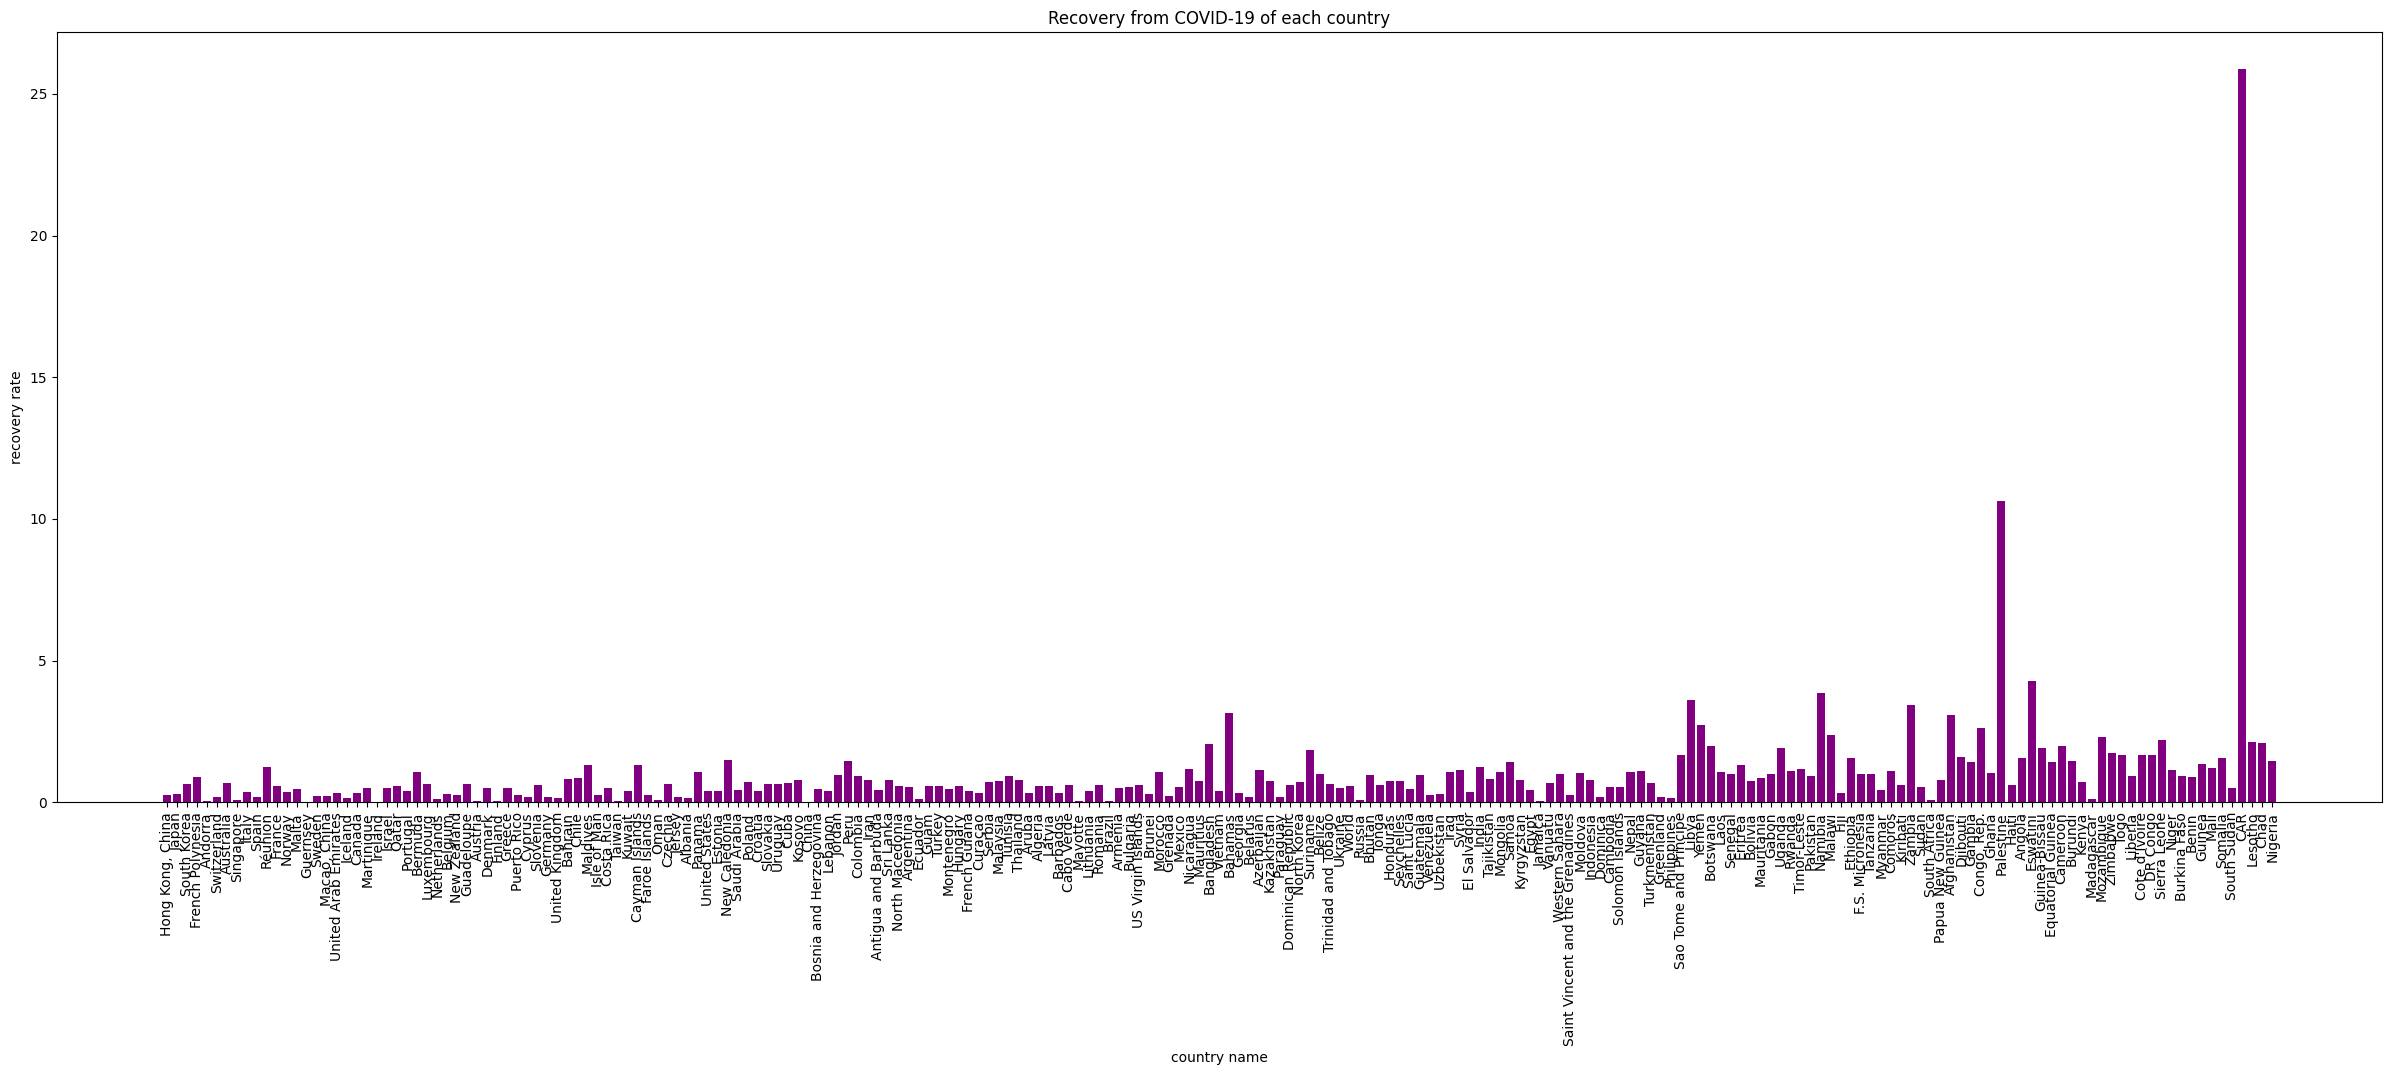

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(x=sh1["Countries and territories"] , height=sh1["Recovery from COVID-19: 2019:2023"] , color= "purple")
plt.title("Recovery from COVID-19 of each country")
plt.xlabel("country name")
plt.ylabel("recovery rate")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sh4= pd.read_excel(r"World Bank Group (2022).xlsx")
sh4

,Countries and territories,All,Male,Female,Sex gap,2014,2014:2019,2019,2019:2020,2020,2020:2021,2021,2021:2022,2022,recovery from COVID-19: 2019:2022
0,"Macao SAR, China",85.380000,82.750000,87.980000,5.230000,83.88000,1.090000,84.980000,0.210000,85.180000,0.22000,85.40,0.020000,85.380000,0.400000
1,Japan,84.000000,81.050000,87.090000,6.040000,83.59000,0.770000,84.360000,0.200000,84.560000,0.11000,84.45,0.450000,84.000000,0.360000
2,"Hong Kong SAR, China",83.660000,80.700000,86.770000,6.070000,83.94000,1.220000,85.160000,0.340000,85.500000,0.04000,85.53,1.870000,83.660000,1.490000
3,French Polynesia,83.550000,81.330000,85.980000,4.650000,82.21000,0.780000,83.000000,0.780000,82.220000,2.73000,79.49,4.060000,83.550000,0.550000
4,Switzerland,83.450000,81.600000,85.400000,3.800000,83.20000,0.710000,83.900000,0.900000,83.000000,0.75000,83.75,0.300000,83.450000,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Central African Republic,54.480000,52.260000,56.830000,4.570000,50.57000,4.460000,55.020000,0.420000,54.600000,0.71000,53.90,0.580000,54.480000,0.550000
199,Nigeria,53.630000,53.300000,53.970000,0.670000,51.79000,1.120000,52.910000,0.020000,52.890000,0.21000,52.68,0.960000,53.630000,0.720000
200,Lesotho,53.040000,50.320000,55.920000,5.600000,50.03000,4.140000,54.170000,0.520000,54.690000,1.63000,53.06,0.030000,53.040000,1.140000
201,Chad,53.000000,51.300000,54.770000,3.470000,51.20000,2.060000,53.260000,0.480000,52.780000,0.25000,52.52,0.470000,53.000000,0.260000


In [ ]:
## countries with the highest Wiggle from2019 to 2022
sh4["2014:2022"]= sh4["2014"] - sh4["2022"]
sh4[["Countries and territories","2014:2022"]]. sort_values(by=("2014:2022") , ascending =False).head(10)

,Countries and territories,2014:2022
139,St. Vincent and the Grenadines,5.50
86,Lebanon,4.55
166,Yemen,3.66
92,Oman,3.51
141,Guatemala,3.29
143,Ukraine,2.60
131,Paraguay,2.41
95,Colombia,2.38
124,Belize,2.35
128,Jamaica,2.35


In [ ]:
## the countries with high recovery after COVID-19

Fully_Recovered_World_Bank_Group = sh4[sh4[ "recovery from COVID-19: 2019:2022"]>np.mean(sh4[ "recovery from COVID-19: 2019:2022"])]
print(f"Countries with high recovery rates = {Fully_Recovered_World_Bank_Group["recovery from COVID-19: 2019:2022"].count()} country ")
Fully_Recovered_World_Bank_Group[["Countries and territories","recovery from COVID-19: 2019:2022"]].head()

Countries with high recovery rates = 57 country 


,Countries and territories,recovery from COVID-19: 2019:2022
2,"Hong Kong SAR, China",1.49
19,Iceland,0.99
37,Greece,1.00
57,USA,1.35
58,Costa Rica,2.11


In [ ]:
## the countries with low recovery after COVID-19

Not_Recovered_World_Bank_Group = sh4[sh4[ "recovery from COVID-19: 2019:2022"]<np.mean(sh4[ "recovery from COVID-19: 2019:2022"])]
print(f"Countries with low recovery rates ={Not_Recovered_World_Bank_Group[ "recovery from COVID-19: 2019:2022"].count()} country ")
Not_Recovered_World_Bank_Group[["Countries and territories","recovery from COVID-19: 2019:2022"]]

Countries with low recovery rates =145 country 


,Countries and territories,recovery from COVID-19: 2019:2022
0,"Macao SAR, China",0.40
1,Japan,0.36
3,French Polynesia,0.55
4,Switzerland,0.45
5,Faroe Islands,0.65
...,...,...
193,Cote d'Ivoire,0.40
197,South Sudan,0.34
198,Central African Republic,0.55
199,Nigeria,0.72


In [ ]:
print("Countries with the largest sex gap according to World Bank Group studies ::")
sh4[[ "Countries and territories","Sex gap" ]].sort_values(by=("Sex gap"),ascending = False).head(10)

Countries with the largest sex gap according to World Bank Group studies ::


,Countries and territories,Sex gap
102,Armenia,10.58
143,Ukraine,10.38
103,Belarus,10.29
107,Russia,10.20
80,Latvia,9.80
115,Georgia,9.70
81,Vietnam,9.36
105,Mongolia,9.30
142,Moldova,9.10
117,El Salvador,8.98


In [ ]:
Cointinue of Analysis

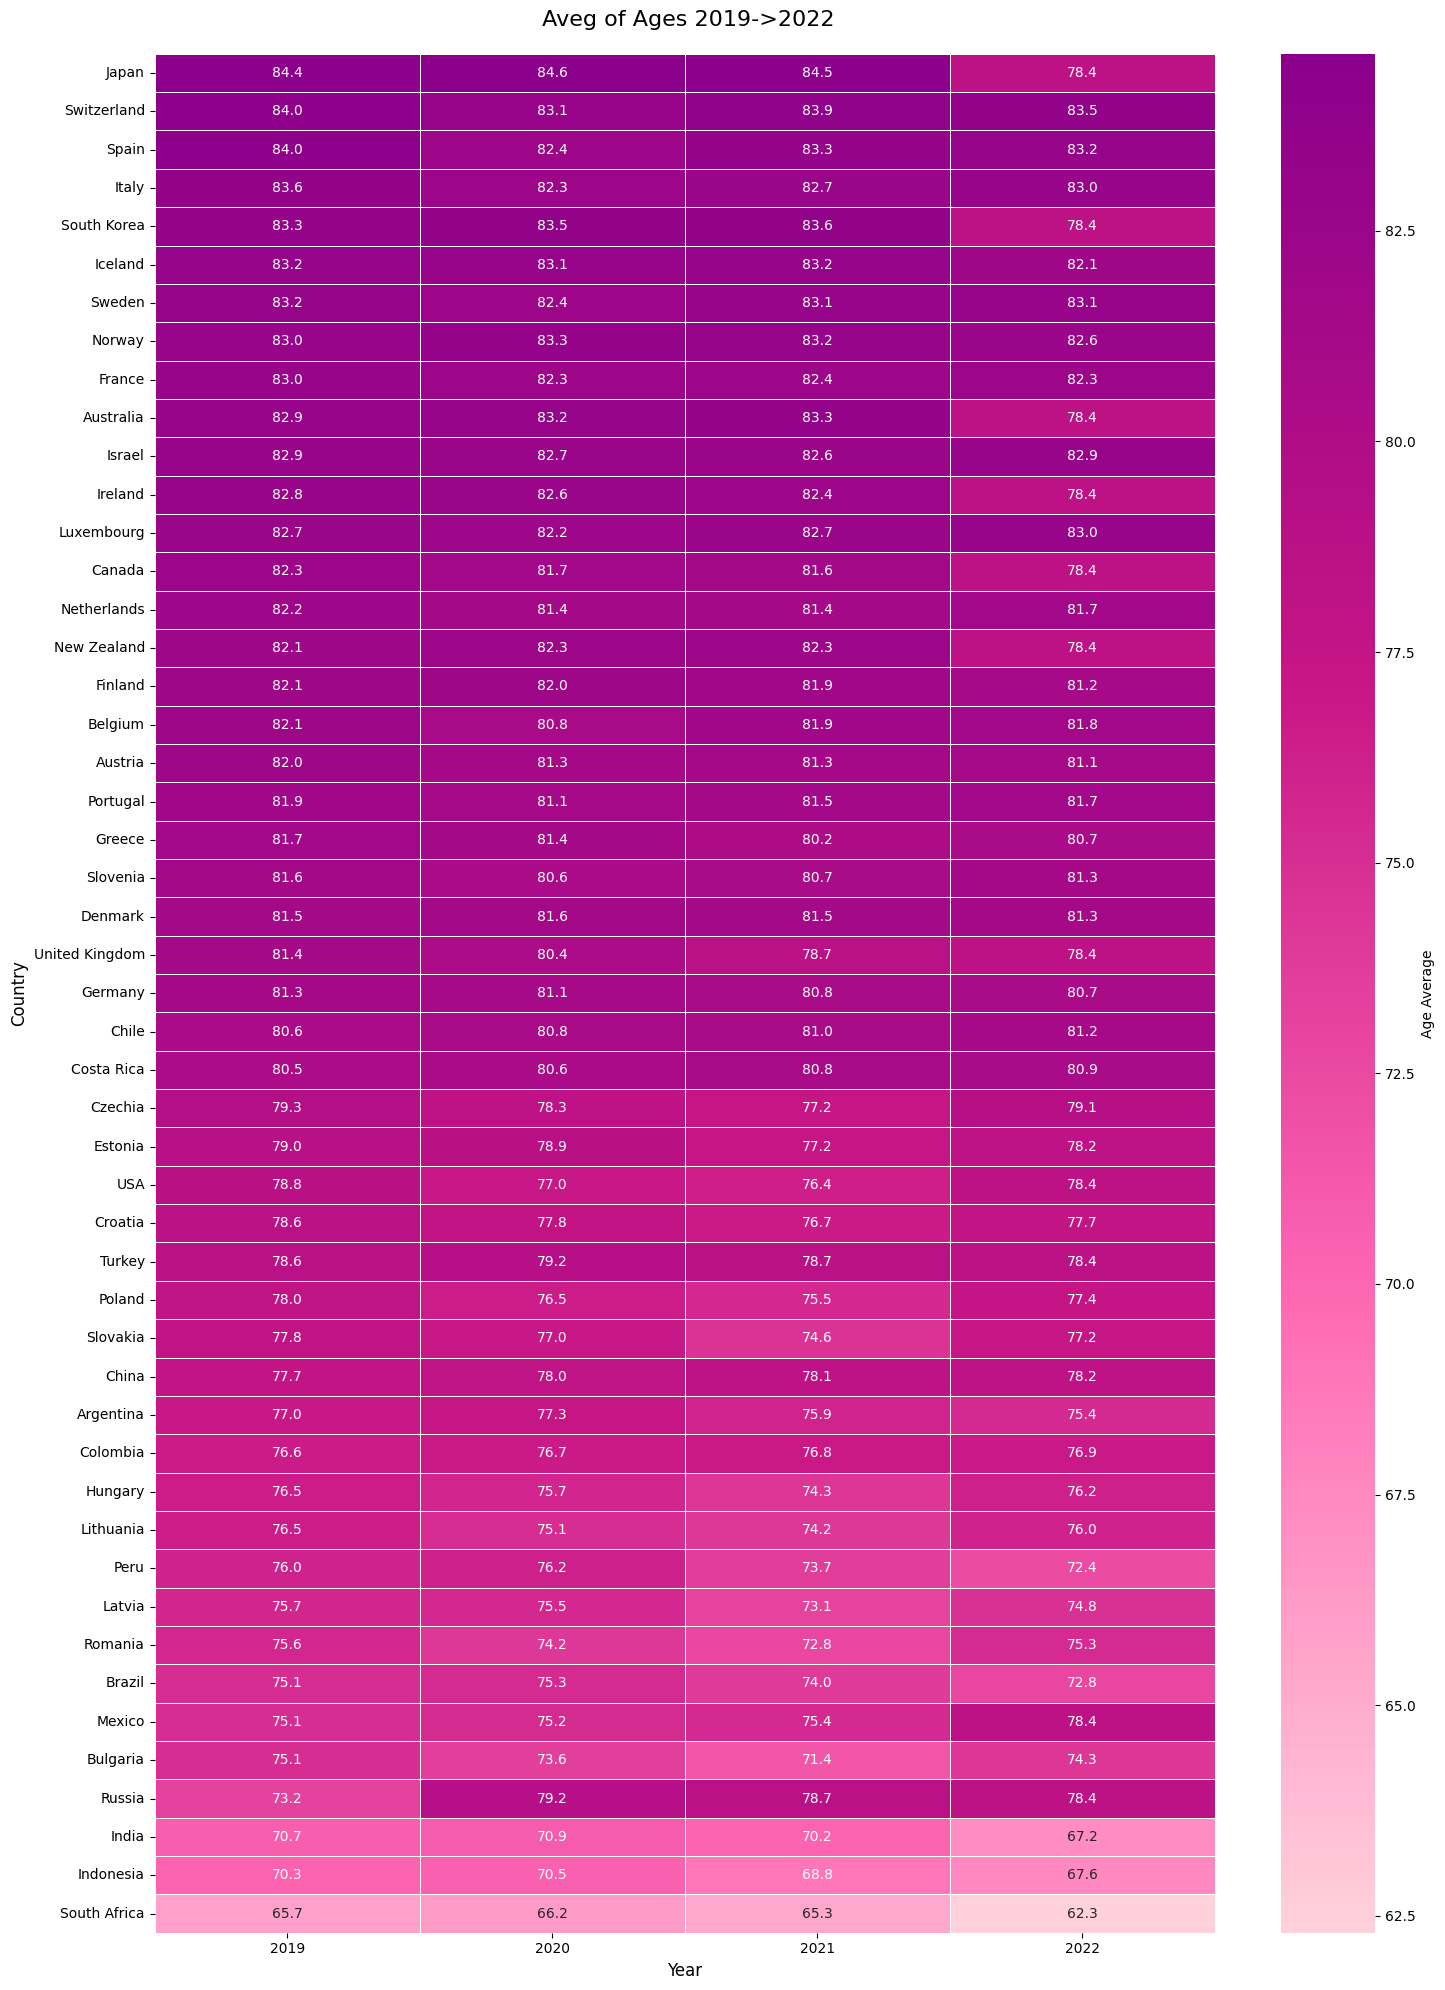

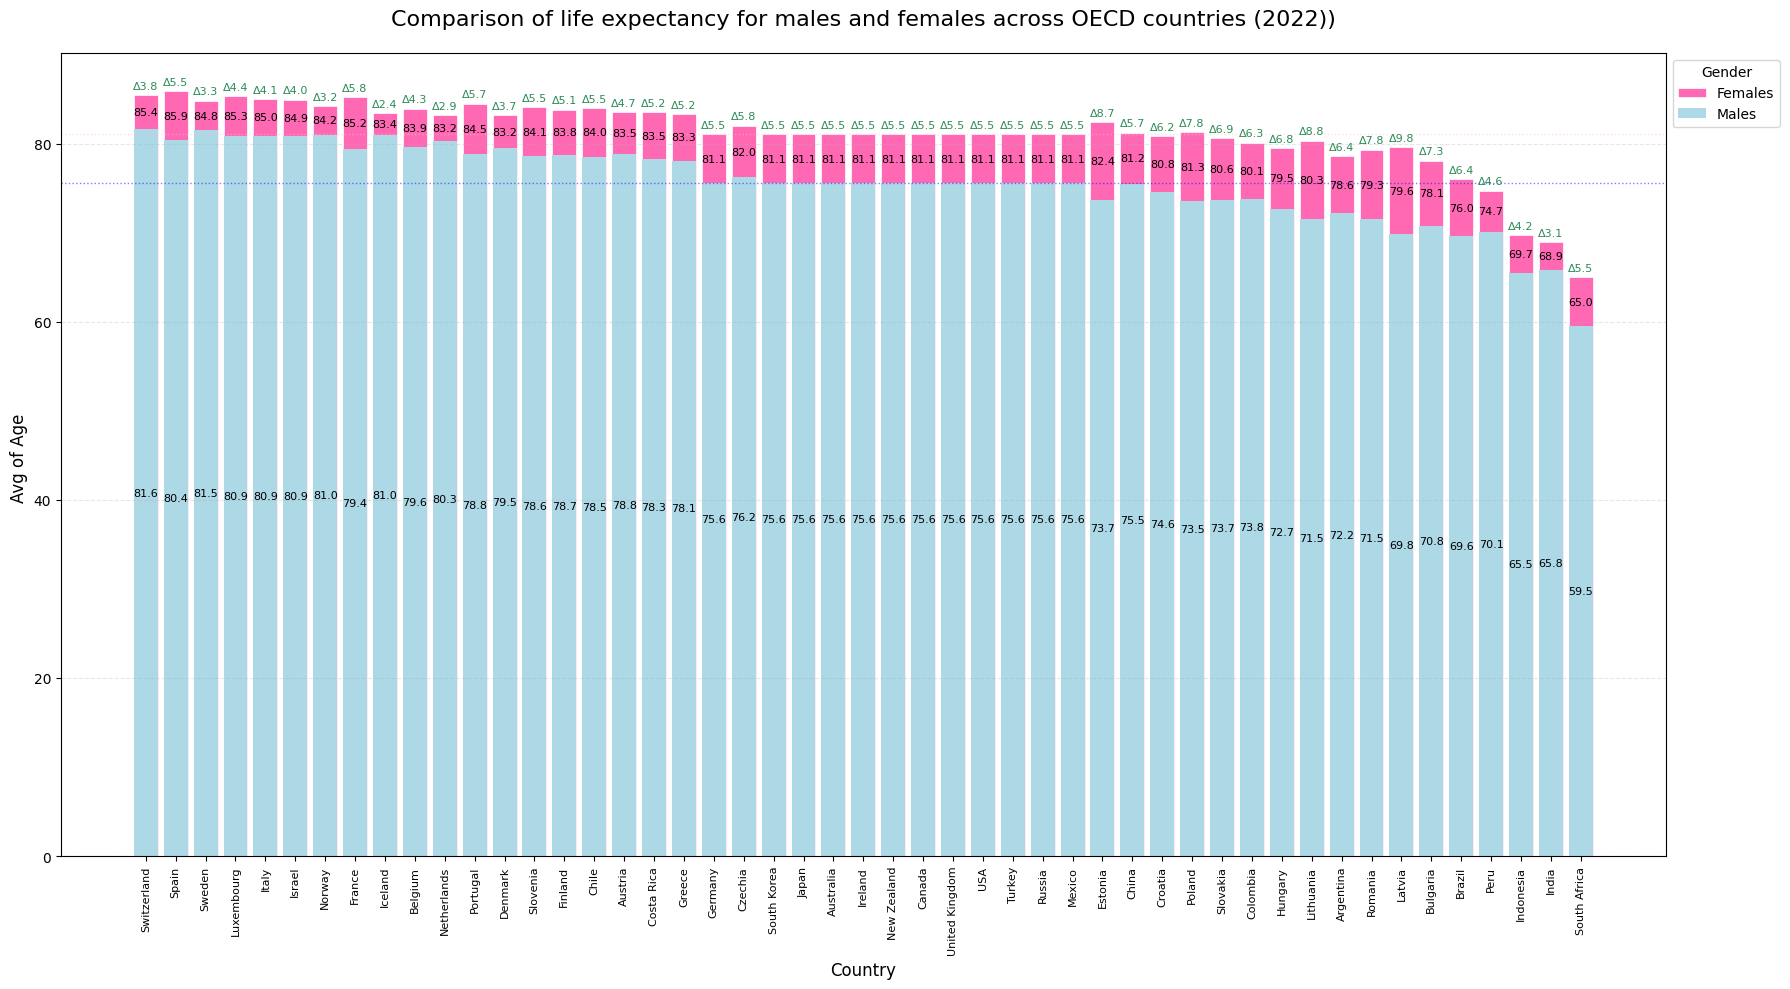

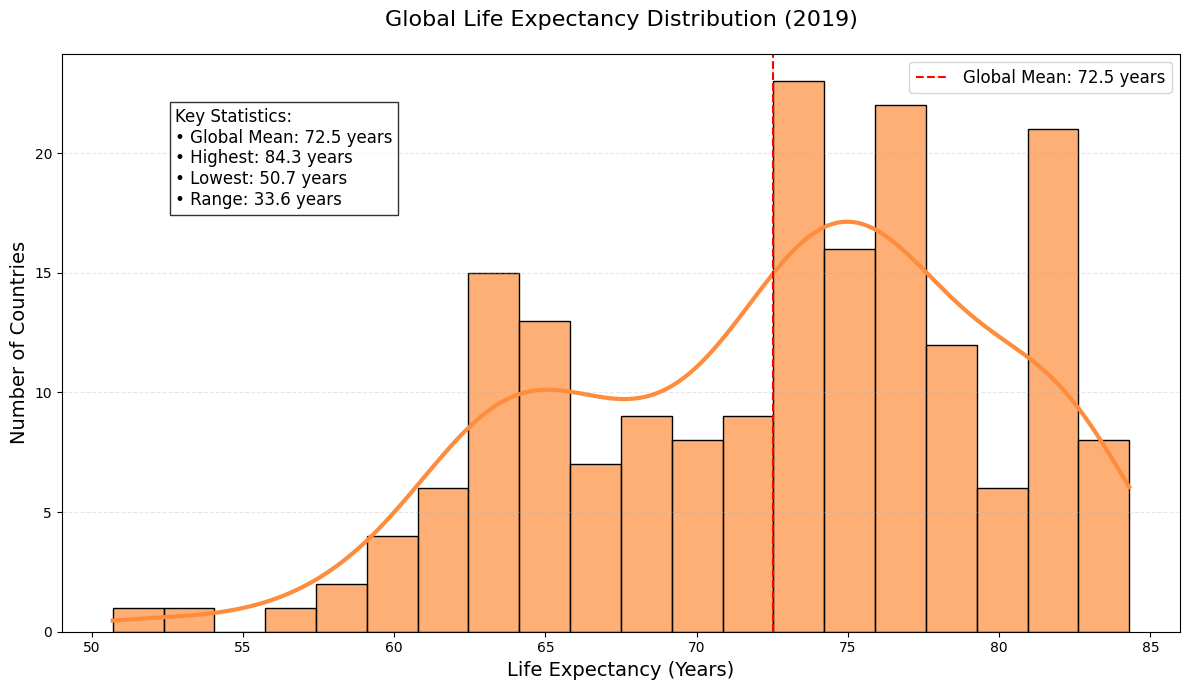

In [3]:
#continue of analysis(OECD sheet)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
# HeatMap to show the avg of ages of each country over years

df = pd.read_excel("/content/Clean OECD (2022).xlsx")
years = ['2019', '2020', '2021', '2022'] # select columns
data = df[['Country'] + years]
data.set_index('Country', inplace=True)
colors = ["#FFD1DC", "#FF69B4", "#C71585", "#8B008B"]  # create color pink
cmap = LinearSegmentedColormap.from_list("pink_gradient", colors)
plt.figure(figsize=(15, 20)) # create plot
sns.heatmap(data,
            annot=True,
            fmt=".1f",
            cmap=cmap,
            linewidths=0.5,
            cbar_kws={'label': 'Age Average'})
plt.title(' Aveg of Ages 2019->2022', fontsize=16, pad=20) # add titles
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
#Stacked bar plot for the gap between each gender
df_sorted = df.sort_values('2022overall', ascending=False) # arrange countries depend on avg of age
countries = df_sorted['Country'].values
male = df_sorted['2022male'].values
female = df_sorted['2022female'].values
plt.figure(figsize=(18, 10)) # create plots
#create stacked bars
bars = plt.bar(countries, female, color='#FF69B4', label='Females')
plt.bar(countries, male, color='#ADD8E6', label='Males')
for bar in bars:# add lines
    bar.set_edgecolor('white')
    bar.set_linewidth(0.5)
for i, (m, f) in enumerate(zip(male, female)): # add values and values of gaps
    plt.text(i, m/2, f'{m:.1f}', ha='center', va='center', color='black', fontsize=8)
    plt.text(i, m + (f-m)/2, f'{f:.1f}', ha='center', va='center', color='black', fontsize=8)
    gap = f - m  #calculate gap
    plt.text(i, f + 0.5, f'Δ{gap:.1f}', ha='center', va='bottom', color='#2E8B57', fontsize=8)
plt.title('Comparison of life expectancy for males and females across OECD countries (2022))', fontsize=16, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Avg of Age ', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
avg_male = df['2022male'].mean() #line of mean of the year
avg_female = df['2022female'].mean()
plt.axhline(avg_male, color='blue', linestyle=':', linewidth=1, alpha=0.5)
plt.axhline(avg_female, color='pink', linestyle=':', linewidth=1, alpha=0.5)
plt.tight_layout()
plt.show()
# analysis on (health table)
# create a world map to show the countries of best health care and the worst
df = pd.read_excel("/content/Clean World Health Organization (2019).xlsx")
df_clean = df.dropna(subset=['All']).copy()
df_clean = df_clean.rename(columns={'Countries': 'Country'})
orange_palette = ["#FFF5EB", "#FEE6CE", "#FDD0A2", "#FDAE6B", "#FD8D3C", "#F16913", "#D94801", "#A63603", "#7F2704"] #orange color
fig = px.choropleth(df_clean,
                    locations="Country",
                    locationmode="country names",
                    color="All",
                    hover_name="Country",
                    hover_data=["All", "Δ2000"],
                    color_continuous_scale=orange_palette,
                    range_color=(50, 85),
                    title="<b>خريطة متوسط العمر العالمي (2019)</b><br><sup>تدرج لوني من الأدنى (فاتح) إلى الأعلى (غامق)</sup>",
                    labels={'All': 'متوسط العمر'})
fig.update_layout(geo=dict(showframe=False,
                          showcoastlines=True,
                          projection_type='natural earth'),
                 margin=dict(l=0, r=0, t=50, b=0))
fig.show()
# histogram to show the distribution of avg of ages
df_clean = df.rename(columns={'Countries': 'Country'}).dropna(subset=['All'])
plt.figure(figsize=(12, 7))
# Plot distribution with KDE
ax = sns.histplot(data=df_clean, x='All', bins=20,
                 kde=True, color='#FD8D3C',
                 alpha=0.7, line_kws={'lw': 3})
global_mean = df_clean['All'].mean() # add line of global mean
plt.axvline(global_mean, color='red', linestyle='--',
           label=f'Global Mean: {global_mean:.1f} years')
plt.title('Global Life Expectancy Distribution (2019)', fontsize=16, pad=20)
plt.xlabel('Life Expectancy (Years)', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
# Add statistics box
stats_text = f"""Key Statistics:
• Global Mean: {global_mean:.1f} years
• Highest: {df_clean['All'].max():.1f} years
• Lowest: {df_clean['All'].min():.1f} years
• Range: {df_clean['All'].max()-df_clean['All'].min():.1f} years"""
plt.gcf().text(0.15, 0.7, stats_text,
              bbox=dict(facecolor='white', alpha=0.8),
              fontsize=12)
plt.tight_layout()
plt.show()


------------
# Start making relationships between the tables

In [ ]:
un_2022 = sh1[['Countries and territories', '2022']].rename(columns={'Countries and territories': 'Country', '2022': 'UN'})
who_2022 = sh2[['Countries', 'All.2']].rename(columns={'Countries': 'Country', 'All.2': 'WHO'})
cia_2022 = sh3[[sh3.columns[0], sh3.columns[1]]].rename(columns={sh3.columns[0]: 'Country', sh3.columns[1]: 'CIA'})
wb_2022 = sh4[['Countries and territories', '2022']].rename(columns={'Countries and territories': 'Country', '2022': 'World_Bank'})
oecd_2022 = sh6[['Country', '2022']].rename(columns={'2022': 'OECD'})
all_2022 = un_2022
for df in [who_2022, cia_2022, wb_2022, oecd_2022]:
    all_2022 = pd.merge(all_2022, df, on='Country', how='outer')

all_2022 = all_2022.dropna()
print("2022 data from all sources: ")
print(all_2022.head(10))

2022 data from all sources: 
       Country     UN   WHO    CIA  World_Bank       OECD
8    Argentina  75.81  21.1  78.31       76.06  75.400000
11   Australia  82.77  25.6  83.09       83.20  78.376316
12     Austria  81.30  24.1  82.27       81.09  81.100000
19     Belgium  81.16  24.0  81.86       81.70  81.800000
27      Brazil  74.87  21.9  75.92       73.42  72.800000
31    Bulgaria  74.03  19.8  75.57       74.36  74.300000
39      Canada  81.25  25.2  83.80       81.30  78.376316
45       Chile  79.18  24.3  79.79       79.52  81.200000
47    Colombia  76.51  24.0  74.89       73.66  76.900000
53  Costa Rica  79.32  25.0  79.64       77.32  80.900000


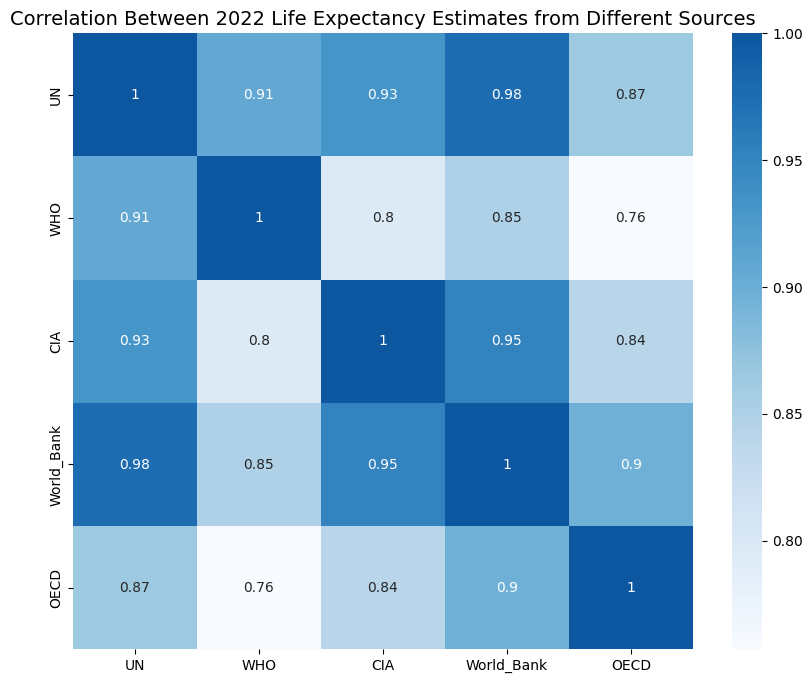

In [ ]:
clean_2022 = all_2022.dropna(thresh=len(all_2022.columns)-2)
plt.figure(figsize=(10, 8))
corr_matrix = clean_2022.drop('Country', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0.9)
plt.title('Correlation Between 2022 Life Expectancy Estimates from Different Sources', fontsize=14)
plt.show()

In [ ]:
merged_data = pd.merge(sh1[['Countries and territories', '2019', '2023', 'Recovery from COVID-19: 2019:2023']],
                       sh4[['Countries and territories', '2019', 'recovery from COVID-19: 2019:2022']],
                       on='Countries and territories', how='inner')
high_recovery = merged_data[merged_data['Recovery from COVID-19: 2019:2023'] > 0.9]
high_recovery['Recovered_to_2019_or_higher'] = high_recovery['2023'] >= high_recovery['2019_x']
high_recovery[['Countries and territories', '2019_x', '2023', 'Recovery from COVID-19: 2019:2023', 'Recovered_to_2019_or_higher']]


C:\Users\hp\AppData\Local\Temp\ipykernel_12940\707532891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_recovery['Recovered_to_2019_or_higher'] = high_recovery['2023'] >= high_recovery['2019_x']


,Countries and territories,2019_x,2023,Recovery from COVID-19: 2019:2023,Recovered_to_2019_or_higher
19,Bermuda,81.25,82.31,1.06,True
35,Maldives,79.71,81.04,1.33,True
39,Cayman Islands,79.05,80.36,1.31,True
44,Panama,78.51,79.59,1.08,True
46,New Caledonia,77.26,78.77,1.50,True
...,...,...,...,...,...
185,Mali,59.22,60.44,1.22,True
186,Somalia,57.25,58.82,1.57,True
188,Lesotho,55.25,57.38,2.13,True
189,Chad,52.99,55.07,2.08,True


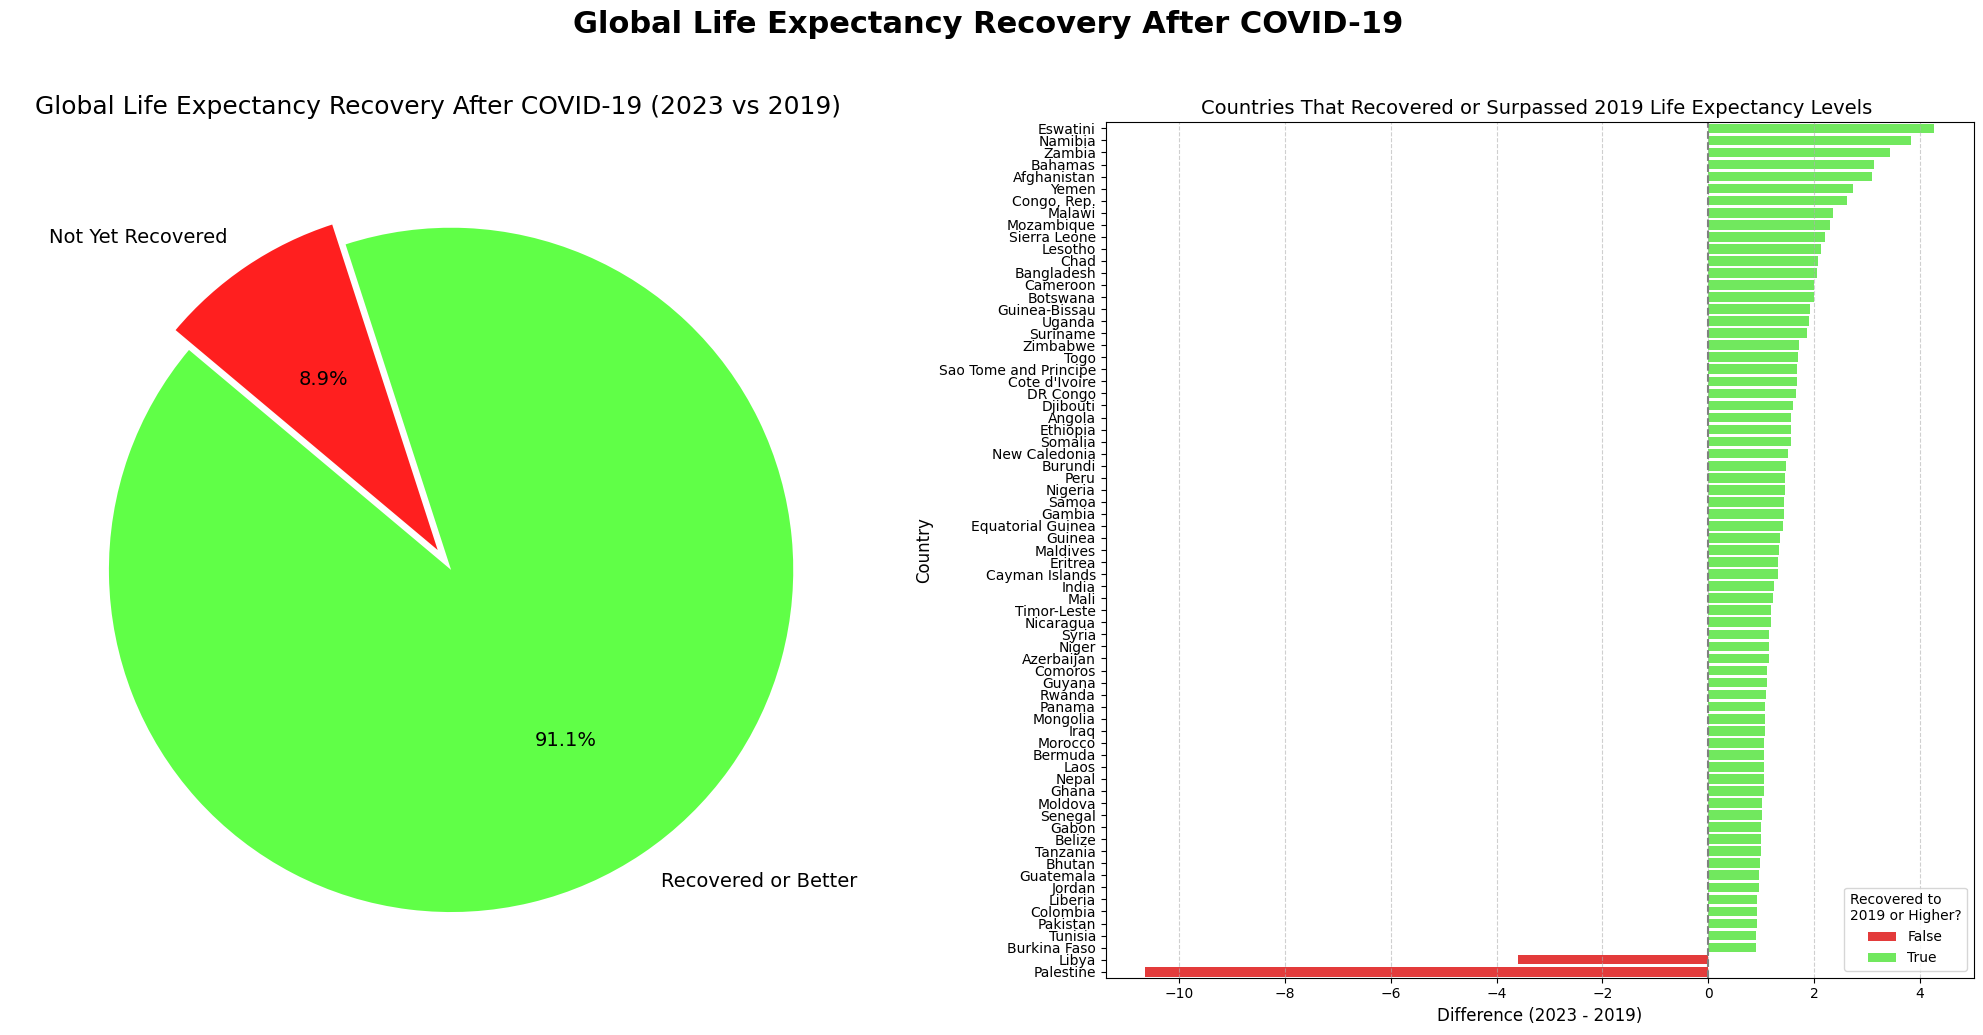

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
recovered_countries = merged_data[merged_data['2023'] >= merged_data['2019_x']]
not_recovered_countries = merged_data[merged_data['2023'] < merged_data['2019_x']]
total = len(merged_data)
recovered_pct = (len(recovered_countries) / total) * 100
not_recovered_pct = 100 - recovered_pct
fig.suptitle("Global Life Expectancy Recovery After COVID-19", fontsize=22, fontweight='bold', y=1.03)
# Pie chart
labels = ['Recovered or Better', 'Not Yet Recovered']
sizes = [recovered_pct, not_recovered_pct]
colors = ['#60ff47', '#ff1f1f']
explode = (0.07, 0)
ax[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
          startangle=140, textprops={'fontsize': 14})
ax[0].set_title("Global Life Expectancy Recovery After COVID-19 (2023 vs 2019)", fontsize=18)

# Bar chart
plot_data = high_recovery.copy()
plot_data['Difference'] = plot_data['2023'] - plot_data['2019_x']
plot_data = plot_data.sort_values(by='Difference', ascending=False)
sns.barplot(
    data=plot_data,
    x='Difference',
    y='Countries and territories',
    hue='Recovered_to_2019_or_higher',
    dodge=False,
    palette={True: '#60ff47', False: '#ff1f1f'},
    ax=ax[1]
)

ax[1].set_title("Countries That Recovered or Surpassed 2019 Life Expectancy Levels ", fontsize=14)
ax[1].set_xlabel('Difference (2023 - 2019)', fontsize=12)
ax[1].set_ylabel('Country', fontsize=12)
ax[1].axvline(0, color='gray', linestyle='--')
ax[1].legend(title='Recovered to \n2019 or Higher?', loc='lower right')
ax[1].grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


          Country  UN (Sex gap)  WHO (FΔM)
75        Jamaica          5.02        3.3
86        Lesotho          5.39        6.5
24   Burkina Faso          4.30        5.1
135        Serbia          6.54        4.8
79          Kenya          4.46        4.7
102    Montenegro          6.58        5.5
153    Tajikistan          4.40        3.9
108   Netherlands          3.20        2.7
48       Eswatini          5.77        9.8
155      Thailand          8.70        6.6
76          Japan          6.05        5.4
125         Qatar          1.76        1.4
84         Latvia          8.91        9.2
172         Yemen          4.15        4.5
0     Afghanistan          3.07        0.1
67        Iceland          3.52        3.1
138     Singapore          5.00        4.5
124      Portugal          5.68        5.8
9      Azerbaijan          5.57        5.3
66        Hungary          6.48        6.5
22         Brazil          6.22        7.0
103       Morocco          4.43        2.6
145   South

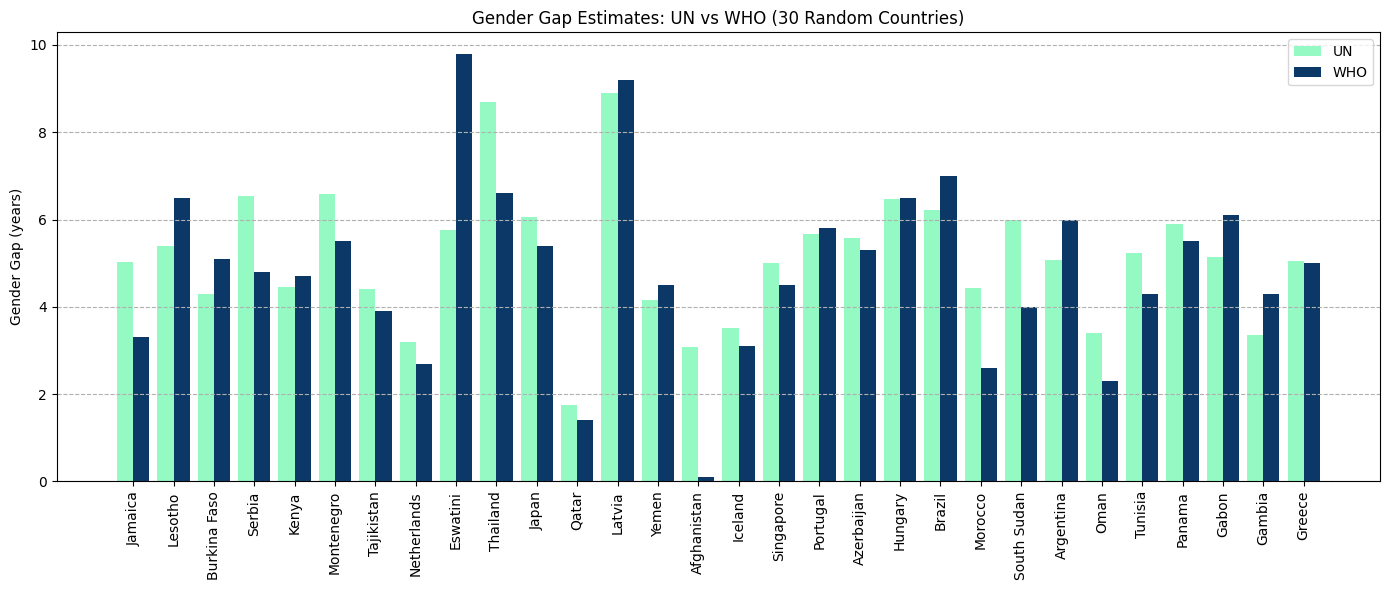

In [ ]:
common_countries = set(sh1['Countries and territories']).intersection(set(sh2['Countries']))
common_countries = sorted(common_countries)
results = []
for country in common_countries:
    un_gap = sh1.loc[sh1['Countries and territories'] == country, 'Sex gap'].values[0]
    who_gap = sh2.loc[sh2['Countries'] == country, 'FΔM'].values[0]
    results.append({'Country': country, 'UN (Sex gap)': un_gap, 'WHO (FΔM)': who_gap})

df = pd.DataFrame(results)
random_gap = df.sample(30)
print(random_gap[['Country', 'UN (Sex gap)', 'WHO (FΔM)']])
plt.figure(figsize=(14, 6))
x = np.arange(len(random_gap['Country']))
plt.bar(x - 0.2, random_gap['UN (Sex gap)'], 0.4, label='UN', color='#95f9c3')
plt.bar(x + 0.2, random_gap['WHO (FΔM)'], 0.4, label='WHO', color='#0b3866')
plt.xticks(x, random_gap['Country'], rotation=90)
plt.title('Gender Gap Estimates: UN vs WHO (30 Random Countries)')
plt.ylabel('Gender Gap (years)')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
covid_impact = sh2[['Countries', 'All', 'All.1']].rename(columns={'All': 'At_Birth_2019', 'All.1': 'At_Birth_2022'})
covid_impact['Decline'] = covid_impact['At_Birth_2019'] - covid_impact['At_Birth_2022']
top_decline = covid_impact.sort_values('Decline', ascending=False).head(20)
top_decline.sort_values('Decline', ascending=False).head(20)

,Countries,At_Birth_2019,At_Birth_2022,Decline
39,United States of America,78.5,66.1,12.4
7,Australia,83.0,70.9,12.1
15,New Zealand,82.0,70.2,11.8
24,United Kingdom,81.4,70.1,11.3
9,Norway,82.6,71.4,11.2
4,Spain,83.2,72.1,11.1
6,Italy,83.0,71.9,11.1
48,Iran,77.3,66.3,11.0
28,Kuwait,81.0,70.1,10.9
14,Canada,82.2,71.3,10.9


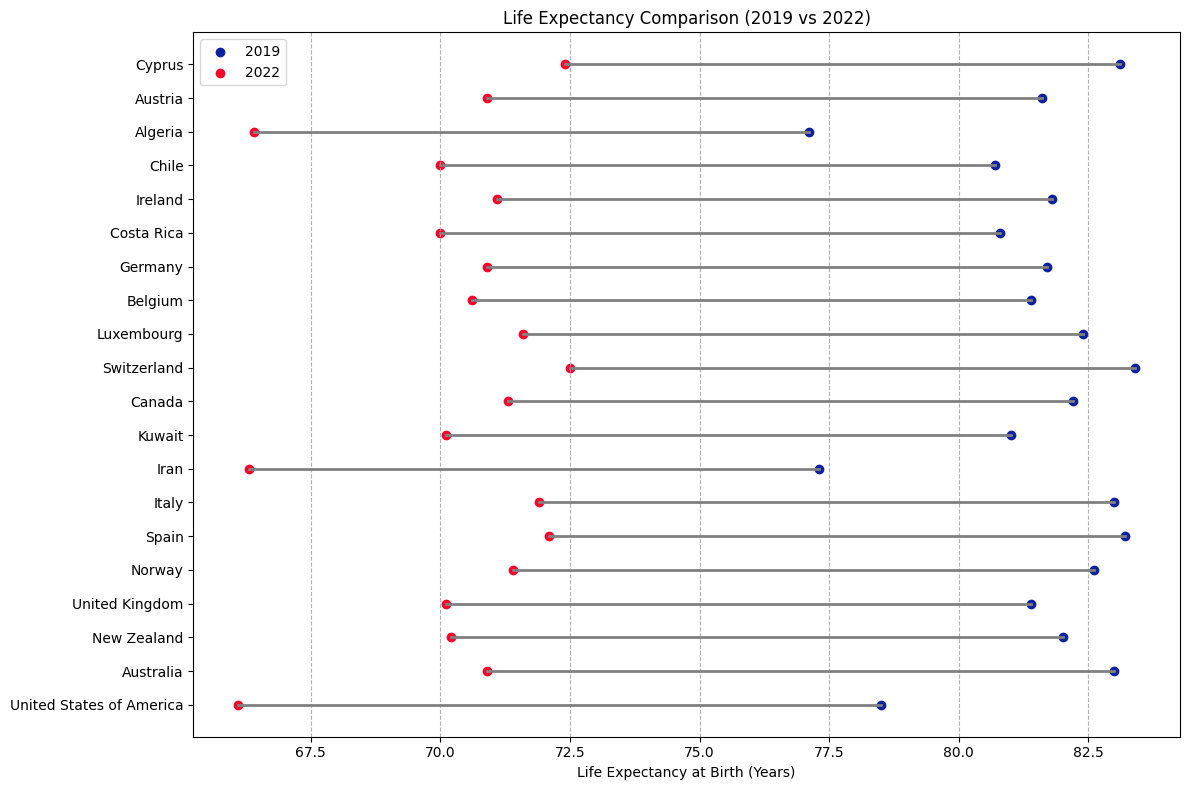

In [ ]:

plt.figure(figsize=(12, 8))
for i in range(len(top_decline)):
    plt.plot([top_decline['At_Birth_2019'].iloc[i], top_decline['At_Birth_2022'].iloc[i]], [i, i], color='gray', linewidth=2)
    plt.scatter(top_decline['At_Birth_2019'].iloc[i], i, color='#0d21a1', label='2019' if i == 0 else "")
    plt.scatter(top_decline['At_Birth_2022'].iloc[i], i, color='#ff002b', label='2022' if i == 0 else "")

plt.yticks(range(len(top_decline)), top_decline['Countries'])
plt.xlabel('Life Expectancy at Birth (Years)')
plt.title('Life Expectancy Comparison (2019 vs 2022)')
plt.grid(axis='x', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


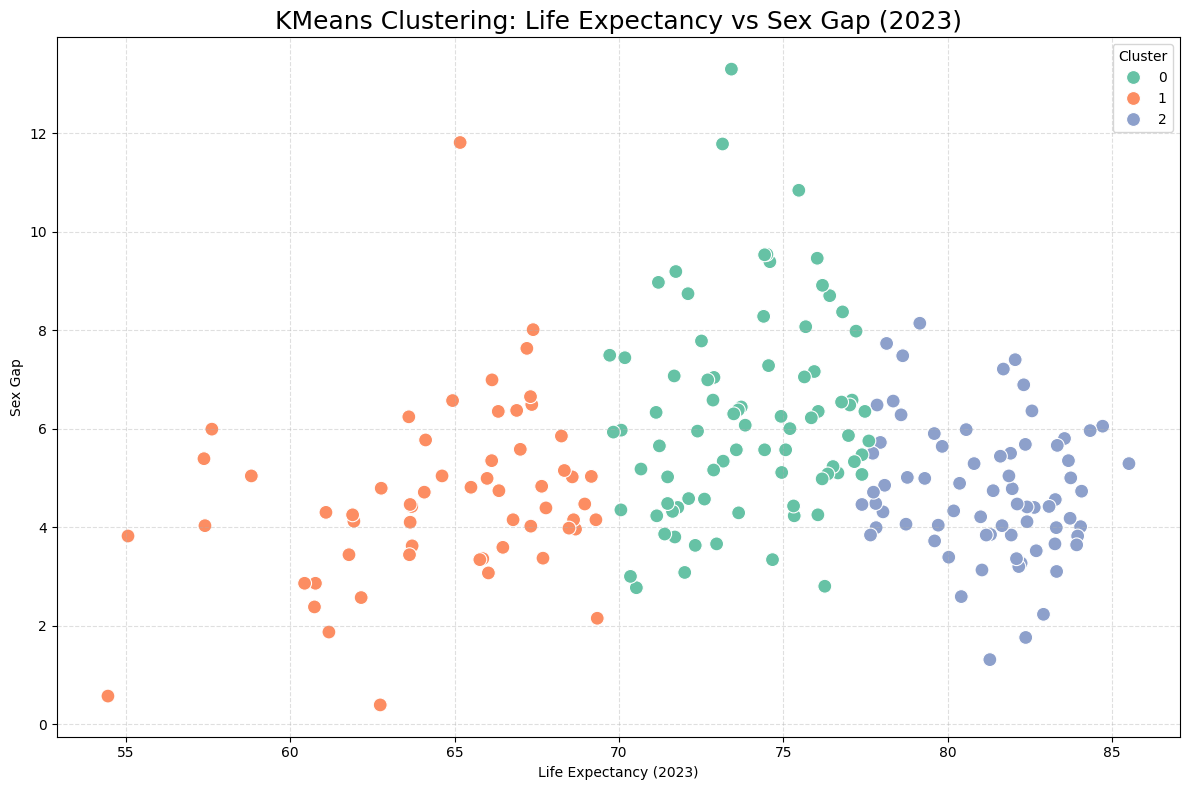

,Cluster 0,Cluster 1,Cluster 2
0,Antigua and Barbuda,Libya,"Hong Kong, China"
1,Sri Lanka,Yemen,Japan
2,Argentina,Botswana,South Korea
3,Ecuador,Laos,French Polynesia
4,Guam,Senegal,Andorra
...,...,...,...
75,Guyana,NaN,NaN
76,Turkmenistan,NaN,NaN
77,Greenland,NaN,NaN
78,Philippines,NaN,NaN


In [ ]:
cluster_data = sh1[['2023', 'Recovery from COVID-19: 2019:2023', 'Sex gap']]
kmeans = KMeans(n_clusters=3)

sh1['Cluster'] = kmeans.fit_predict(cluster_data)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sh1, x='2023', y='Sex gap', hue='Cluster', palette='Set2', s=100)
plt.title('KMeans Clustering: Life Expectancy vs Sex Gap (2023)', fontsize=18)
plt.xlabel('Life Expectancy (2023)')
plt.ylabel('Sex Gap')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

clusters = sh1[['Countries and territories', 'Cluster']]
cluster_groups = clusters.groupby('Cluster')['Countries and territories'].apply(list)

max_len = max(len(countries) for countries in cluster_groups)
cluster_df = pd.DataFrame({f'Cluster {i}': pd.Series(countries)
                           for i, countries in cluster_groups.items()})
display(cluster_df)
